In [0]:
from google.colab import drive
drive.mount ('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import os
import random
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
%matplotlib inline

import tensorflow as tf
from pylab import rcParams
from plotly import tools
#import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import imdb
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
import math
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


**THE BLOOMBERG TERMINAL**

Actually this is nothing like the actual Bloomberg terminal. However, I had three objectives going into this project, especially with my interest surrounding rapid options trading in financial markets. 



*   I wanted to come out of here with a comprehesive statistical and vizualization rhetoric
*   Implement some new research in the space moving forward

*   Have clear and concise improvements to the project planned which would enhance it
*   Be proud of having done something cool in my area of interest

The dataset I have used here is the Dow Jones Industrial Average Dataset having major stock data from the Dow Jones Index from 2005 to 2018. 

some of the terms in the dataset include:

Open - Opening price

High - Highest price on that date

Low - Lowest Price

Close - Price when trading closed for the day

Volume - Volume of stocks traded

Name - Name of the stock




In [0]:
path = "/content/drive/My Drive/"

**Data Pre-Processing for Statistical Functionalities**

In [0]:
d = pd.read_csv(path + 'stock-time-series-20050101-to-20171231/all_stocks_2006-01-01_to_2018-01-01.csv')

In [0]:
d.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [0]:
d.Date = pd.to_datetime(d.Date)

In [0]:
d.describe()

,Open,High,Low,Close,Volume
count,93587.000000,93602.000000,93592.000000,93612.000000,9.361200e+04
mean,85.623260,86.387045,84.836664,85.641753,2.015667e+07
std,108.151723,108.956365,107.225361,108.121106,3.442108e+07
min,6.750000,7.170000,0.000000,6.660000,0.000000e+00
25%,33.950000,34.290000,33.600000,33.960000,5.040180e+06
50%,60.040000,60.630000,59.490000,60.050000,9.701142e+06
75%,94.000000,94.740000,93.250000,94.012500,2.075222e+07
max,1204.880000,1213.410000,1191.150000,1195.830000,8.432640e+08


In [0]:
#d.set_index('Date', inplace=True)

#Backfill `Open` column
values = np.where(d['2017-07-31']['Open'].isnull(), d['2017-07-28']['Open'], d['2017-07-31']['Open'])
d['2017-07-31']= d['2017-07-31'].assign(Open=values.tolist())

values = np.where(d['2017-07-31']['Close'].isnull(), d['2017-07-28']['Close'], d['2017-07-31']['Close'])
d['2017-07-31']= d['2017-07-31'].assign(Close=values.tolist())

values = np.where(d['2017-07-31']['High'].isnull(), d['2017-07-28']['High'], d['2017-07-31']['High'])
d['2017-07-31']= d['2017-07-31'].assign(High=values.tolist())

values = np.where(d['2017-07-31']['Low'].isnull(), d['2017-07-28']['Low'], d['2017-07-31']['Low'])
d['2017-07-31']= d['2017-07-31'].assign(Low=values.tolist())

d.reset_index(inplace=True)

In [0]:
missing_data_stocks = ['CSCO','AMZN','INTC','AAPL','MSFT','MRK','GOOGL', 'AABA']
columns = d.columns.values
for stock in missing_data_stocks:
    tdf = d[(d.Name == stock) & (d.Date == '2014-03-28')].copy()
    tdf.Date = '2014-04-01'
    pd.concat([d, tdf])
print("Complete")

Complete


In [0]:
d = d[~((d.Date == '2012-08-01') & (d.Name == 'DIS'))]

Since we have four values of stock price for each day, let's create a feature called Price which is the average of all these values.

In [0]:
values = (d['High'] + d['Low'] + d['Open'] + d['Close'])/4
d = d.assign(Price=values)

In [0]:
d.Price.describe()

count    93611.000000
mean        85.626472
std        108.106055
min          6.727500
25%         33.953750
50%         60.067500
75%         93.997500
max       1200.762500
Name: Price, dtype: float64

We can see that 75% of the stocks have a price of under 94$, indicating that the stock market is mostly dominated by the bigger companies.

Let's go one step further and compute the daily growth of the stock prices compared to day 1 of the prices(i.e compute cumalative compound growth)

In [0]:
stock_names = d.Name.unique()
day_prices = d[d.Date == d.Date.min()].Price
price_mapping = {n : c for n, c in zip(stock_names, day_prices)}
base_mapping = np.array(list(map(lambda x : price_mapping[x], d['Name'].values)))
d['Growth'] = d['Price'] / base_mapping - 1
d.Growth.describe()

count    93611.000000
mean         0.789919
std          1.907922
min         -0.808701
25%          0.035007
50%          0.342423
75%          0.816421
max         24.392810
Name: Growth, dtype: float64

The worst performing company had a decline of 81% in their shares compared to their first ever opening price and the best company had a whopping 2439% increase in their share price

In [0]:
sample_dates = pd.date_range(start='2006-01-01', end='2018-01-01', freq='B')
year_end_dates = sample_dates[sample_dates.is_year_end]

In [0]:
best_stocks = d[d.Date == d.Date.max()].sort_values('Growth', ascending=False).head(5)
bs = best_stocks.Name.values

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 15

Name
AAPL     AxesSubplot(0.08,0.2;0.87x0.68)
AMZN     AxesSubplot(0.08,0.2;0.87x0.68)
GOOGL    AxesSubplot(0.08,0.2;0.87x0.68)
MCD      AxesSubplot(0.08,0.2;0.87x0.68)
NKE      AxesSubplot(0.08,0.2;0.87x0.68)
Name: Growth, dtype: object

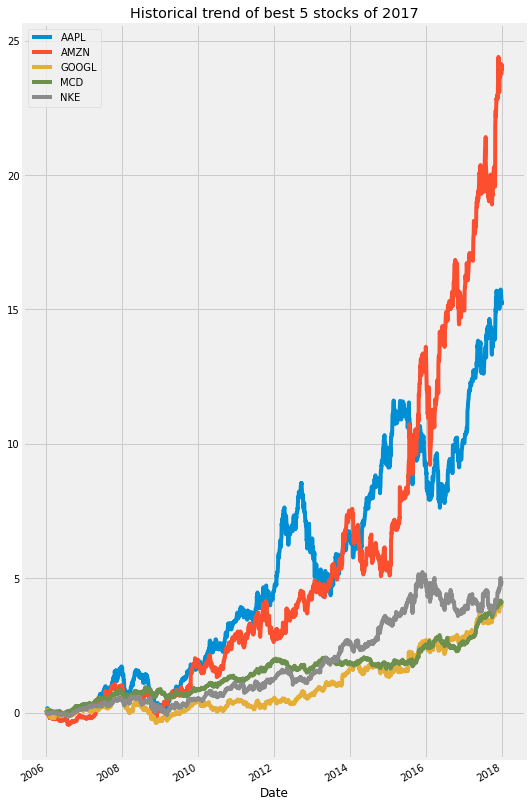

In [0]:
tdf = d.copy()
tdf = d.set_index('Date')
tdf[tdf.Name.isin(bs)].groupby('Name').Growth.plot(title='Historical trend of best 5 stocks of 2017', legend=True)

**Imagine investing in Amazon during 2006 and holding onto the stock**

In [0]:
mcd = pd.read_csv('/content/drive/My Drive/stock-time-series-20050101-to-20171231/MCD_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
mcd.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,34.29,34.29,33.20,33.52,9250100,MCD
2006-01-04,33.43,33.85,33.42,33.82,5990300,MCD
2006-01-05,33.82,34.20,33.73,33.86,6245200,MCD
2006-01-06,34.23,34.30,33.81,34.06,5877100,MCD
2006-01-09,34.00,34.74,33.99,34.71,4659900,MCD


In [0]:
nike = pd.read_csv('/content/drive/My Drive/stock-time-series-20050101-to-20171231/NKE_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
nike.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.85,10.92,10.67,10.74,18468800,NKE
2006-01-04,10.71,10.80,10.67,10.69,15832000,NKE
2006-01-05,10.69,10.83,10.69,10.76,9256000,NKE
2006-01-06,10.79,10.83,10.71,10.72,7573600,NKE
2006-01-09,10.72,10.98,10.72,10.88,10441600,NKE


In [0]:
df = nike

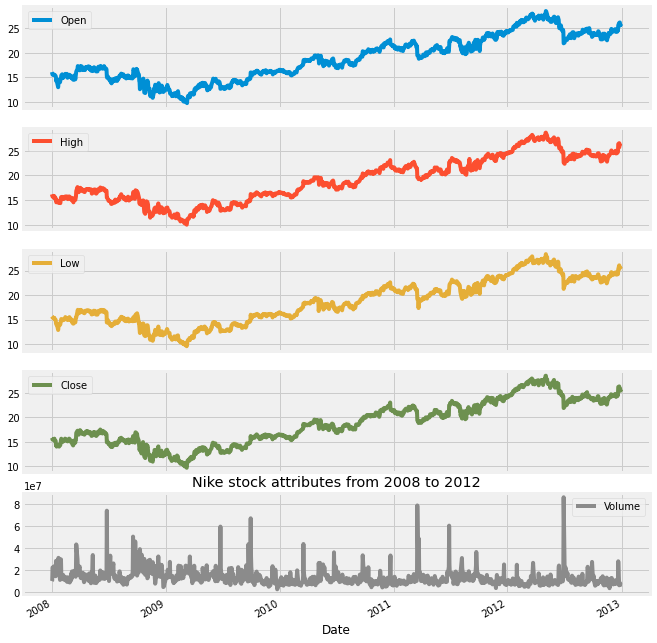

In [0]:
nike['2008':'2012'].plot(subplots=True, figsize=(10,12))
plt.title('Nike stock attributes from 2008 to 2012')
plt.savefig('stocks.png')
plt.show()

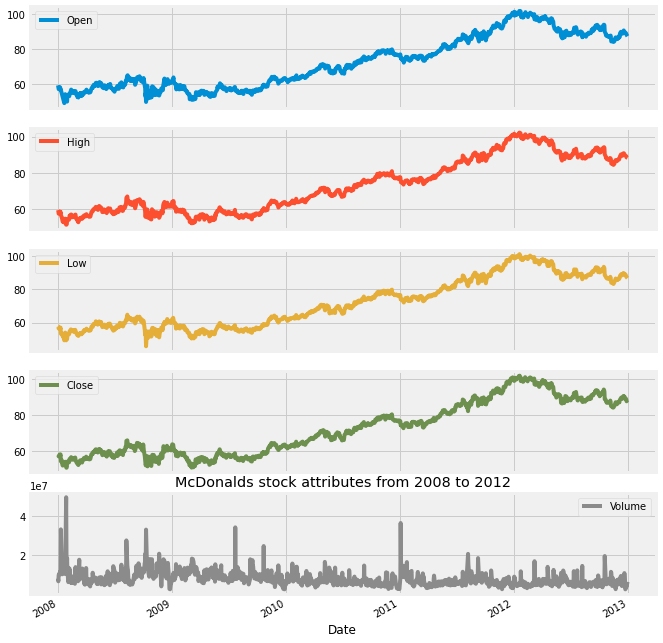

In [0]:
mcd['2008':'2012'].plot(subplots=True, figsize=(10,12))
plt.title('McDonalds stock attributes from 2008 to 2012')
plt.savefig('stocks.png')
plt.show()

In [0]:
mcd['Change'] = mcd.High.div(mcd.High.shift())

Stock Returns Plot

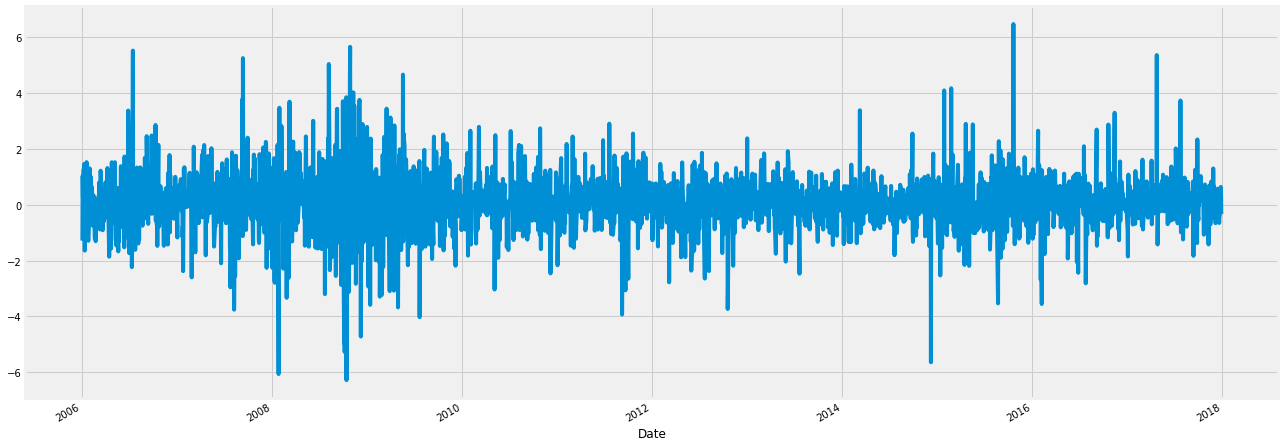

In [0]:
mcd['Return'] = mcd.Change.sub(1).mul(100)
mcd['Return'].plot(figsize=(20,8))

We will compare 2 time series by normalizing them. This is achieved by dividing each time series element of all time series by the first element. This way both series start at the same point and can be easily compared.

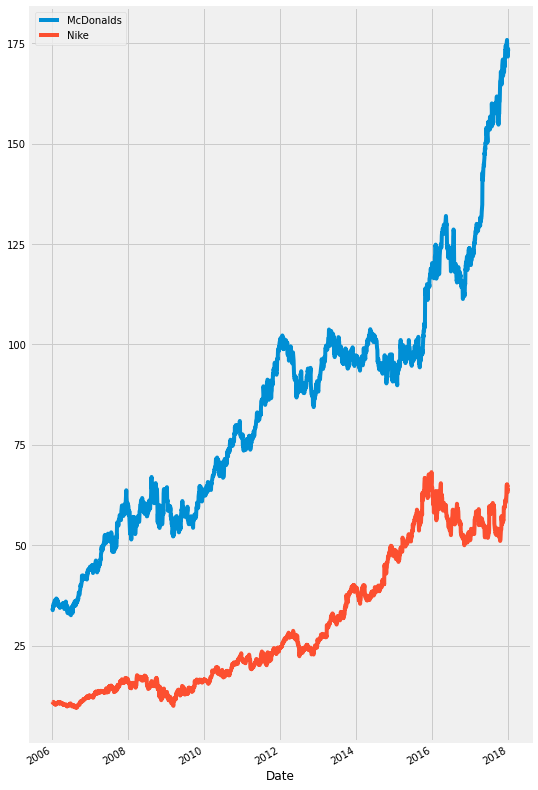

In [0]:
mcd.High.plot()
nike.High.plot()
plt.legend(['McDonalds','Nike'])
plt.show()

**After Normalizing**

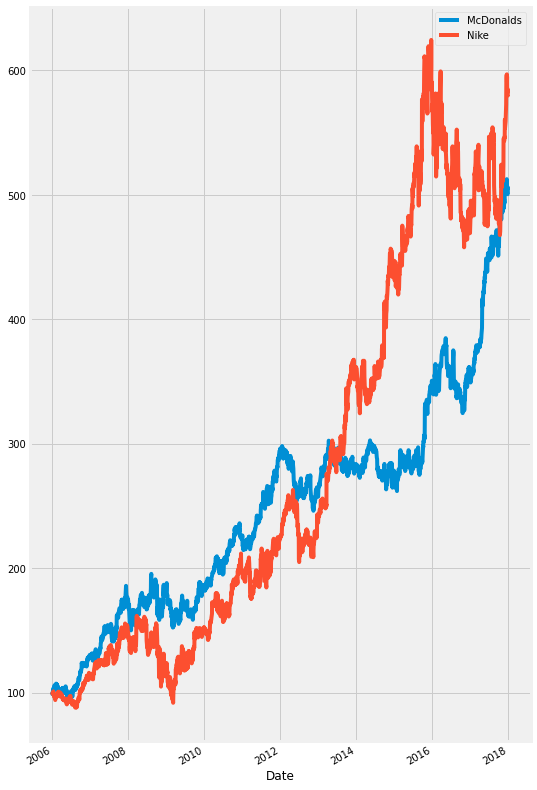

In [0]:
normalized_mcd = mcd.High.div(mcd.High.iloc[0]).mul(100)
normalized_nike = nike.High.div(nike.High.iloc[0]).mul(100)
normalized_mcd.plot()
normalized_nike.plot()
plt.legend(['McDonalds','Nike'])
plt.show()

**OHLC Charts**

An OHLC chart is any type of price chart that shows the open, high, low and close price of a certain time period. Open-high-low-close Charts (or OHLC Charts) are used as a trading tool to visualise and analyse the price changes over time for securities, currencies, stocks, bonds, commodities, etc. OHLC Charts are useful for interpreting the day-to-day sentiment of the market and forecasting any future price changes through the patterns produced.

The y-axis on an OHLC Chart is used for the price scale, while the x-axis is the timescale. On each single time period, an OHLC Charts plots a symbol that represents two ranges: the highest and lowest prices traded, and also the opening and closing price on that single time period (for example in a day). On the range symbol, the high and low price ranges are represented by the length of the main vertical line. The open and close prices are represented by the vertical positioning of tick-marks that appear on the left (representing the open price) and on right (representing the close price) sides of the high-low vertical line.

Colour can be assigned to each OHLC Chart symbol, to distinguish whether the market is "bullish" (the closing price is higher then it opened) or "bearish" (the closing price is lower then it opened). In this case, bearish is signified by red and bullish by green.



In [0]:
import plotly
trace = go.Ohlc(x=nike['2016'].index,
                open=nike['2016'].Open,
                high=nike['2016'].High,
                low=nike['2016'].Low,
                close=nike['2016'].Close)
data = [trace]
plotly.offline.plot(data, filename='nike_ohlc')

'nike_ohlc.html'

A **partial autocorrelation** is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

In the below plot of partial autocorrelation for closing prices of the Nike stock, you can see significant statistical changes only on the first, second and 14th lag.

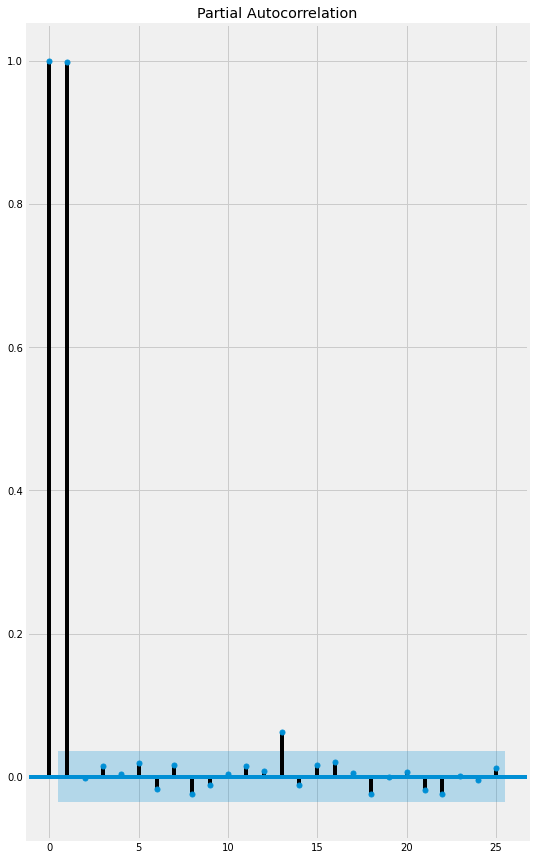

In [0]:
plot_pacf(nike["Close"],lags=25)
plt.show()

* Trend - Consistent upwards or downwards slope of a time series
* Seasonality - Clear periodic pattern of a time series(like sine funtion)
* Noise - Outliers or missing values

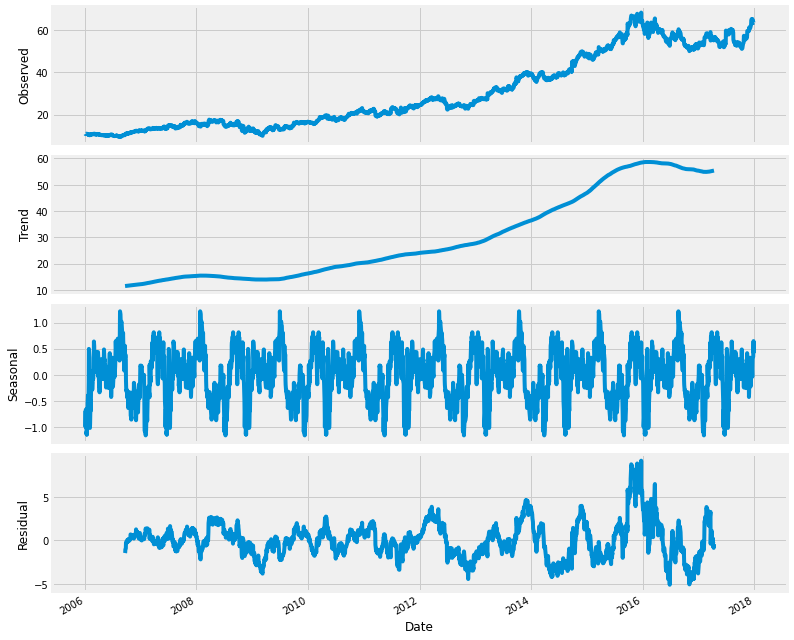

In [0]:
rcParams['figure.figsize'] = 11, 9
decomposed_nike_volume = sm.tsa.seasonal_decompose(nike["High"],freq=360) # The frequncy is annual
figure = decomposed_nike_volume.plot()
plt.show()

An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. It is basically Dickey-Fuller test with more lagged changes on RHS.

In the below case, the p-value of the Volume component of the Nike stock is not 0.5, so the stock trading happening here is no where close to being a random walk

In [0]:
adf = adfuller(nike["Volume"])
print("p-value of nike: {}".format(float(adf[1])))

p-value of nike: 1.131495937540038e-12


**ARIMA**, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

An ARIMA model is characterized by 3 terms: p, d, q

where,

p is the order of the AR term

q is the order of the MA term

d is the number of differencing required to make the time series stationary

If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’.

A pure Auto Regressive (AR only) model is one where Yt depends only on its own lags. That is, Yt is a function of the ‘lags of Yt’

![Pure Moving Average](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-1-min.png)

where, $Y{t-1}$ is the lag1 of the series, $\beta1$ is the coefficient of lag1 that the model estimates and $\alpha$ is the intercept term, also estimated by the model.

Likewise a pure Moving Average (MA only) model is one where Yt depends only on the lagged forecast errors.

![Pure Moving Average](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-2-min.png)

where the error terms are the errors of the autoregressive models of the respective lags. The errors Et and E(t-1) are the errors from the following equations :

![Pure Moving Average](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-3-min.png)

An ARIMA model is one where the time series was differenced at least once to make it stationary and you combine the AR and the MA terms. So the equation becomes:


![Pure Moving Average](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-4-min.png)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3018
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2691.609
Method:                       css-mle   S.D. of innovations              0.590
Date:                Wed, 29 Apr 2020   AIC                           5391.218
Time:                        19:52:06   BIC                           5415.267
Sample:                             1   HQIC                          5399.866
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.005     -0.019      0.985      -0.011       0.011
ar.L1.D.y     -0.6512      0.017    -37.816      0.000      -0.685      -0.617
ar.L2.D.y     -0.3235      0.017    -18.787      0.0

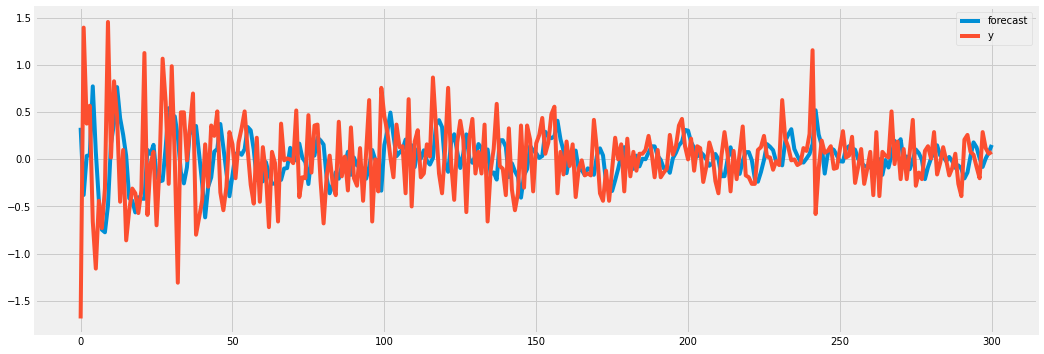

In [0]:
rcParams['figure.figsize'] = 16, 6
model = ARIMA(nike["Close"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

In [0]:
rmse = math.sqrt(mean_squared_error(nike["Close"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 0.6694560839990514.


One limitation of the models that we have considered so far is that they impose a unidirectional relationship — the forecast variable is influenced by the predictor variables, but not vice versa. However, there are many cases where the reverse should also be allowed for — where all variables affect each other. The changes in personal consumption expenditure were forecast based on the changes in personal disposable income. However, in this case a bi-directional relationship may be more suitable: an increase in will lead to an increase in and vice versa.

An example of such a situation occurred in Australia during the Global Financial Crisis of 2008–2009. The Australian government issued stimulus packages that included cash payments in December 2008, just in time for Christmas spending. As a result, retailers reported strong sales and the economy was stimulated. Consequently, incomes increased.

Such feedback relationships are allowed for in the vector autoregressive (VAR) framework. In this framework, all variables are treated symmetrically. They are all modelled as if they all influence each other equally. In more formal terminology, all variables are now treated as “endogenous”.

A **Vector AutoRegression (VAR)** model is a generalisation of the univariate autoregressive model for forecasting a vector of time series. It comprises one equation per variable in the system. The right hand side of each equation includes a constant and lags of all of the variables in the system. To keep it simple, we will consider a two variable VAR with one lag. We write a 2-dimensional VAR(1) as:

\begin{align*}
  Y_t =& \, \beta_{10} + \beta_{11} Y_{t-1} + \dots + \beta_{1p} Y_{t-p} + \gamma_{11} X_{t-1} + \dots + \gamma_{1p} X_{t-p} + u_{1t}, \\
  X_t =& \, \beta_{20} + \beta_{21} Y_{t-1} + \dots + \beta_{2p} Y_{t-p} + \gamma_{21} X_{t-1} + \dots + \gamma_{2p} X_{t-p} + u_{2t}.
\end{align*}

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                           Statespace Model Results                           
Dep. Variable:     ['Close', 'Close']   No. Observations:                 3019
Model:                     VARMA(2,1)   Log Likelihood               -6009.472
                          + intercept   AIC                          12052.943
Date:                Wed, 29 Apr 2020   BIC                          12155.159
Time:                        19:53:47   HQIC                         12089.698
Sample:                             0                                         
                               - 3019                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                51.39, 66.45   Jarque-Bera (JB):    7693.49, 59845.05
Prob(Q):                        0.11, 0.01   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.83, 8.47   Skew:                       0.25, 1.11
Prob(H) (two-sided):            0.00,

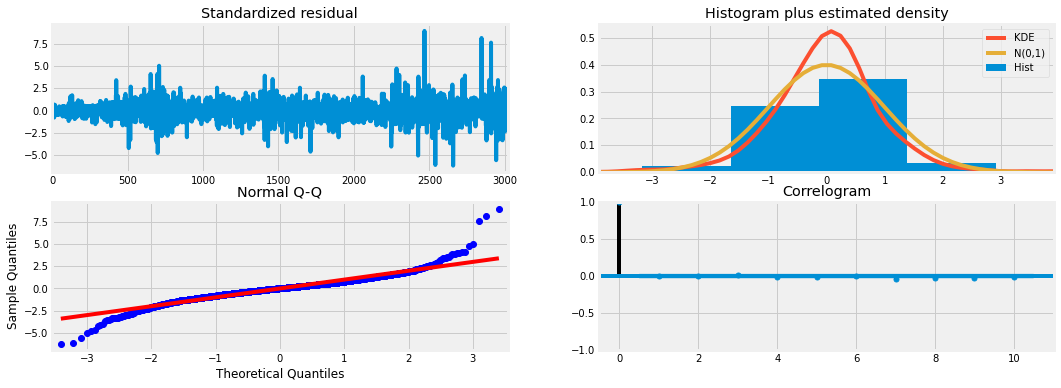

In [0]:
train_sample = pd.concat([mcd["Close"].diff().iloc[1:],nike["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

An extension to ARIMA that supports the direct modeling of the seasonal component of the series is called **SARIMA**.

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 3019
Model:               SARIMAX(4, 0, 4)   Log Likelihood               -2195.460
Date:                Wed, 29 Apr 2020   AIC                           4410.920
Time:                        19:55:44   BIC                           4471.047
Sample:                             0   HQIC                          4432.541
                               - 3019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0007      0.000      1.444      0.149      -0.000       0.002
ar.L1          1.3609      0.028     47.789      0.000       1.305       1.417
ar.L2          0.0488      0.021      2.305      0.0

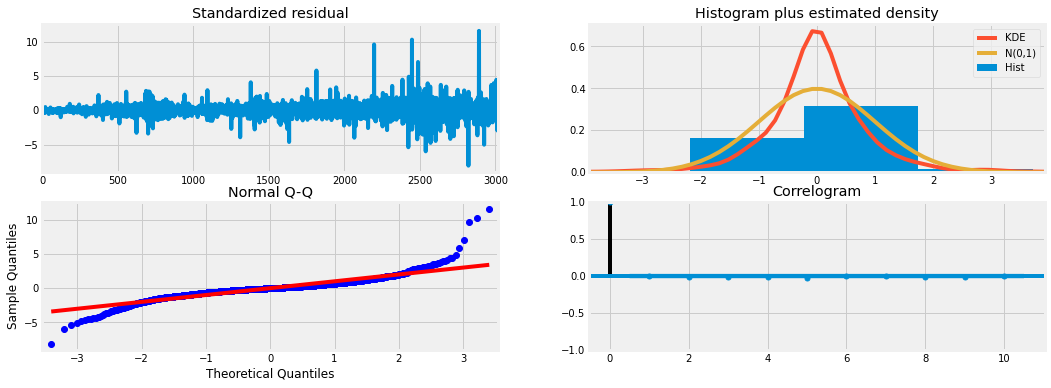

In [0]:
train_sample = nike["Close"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

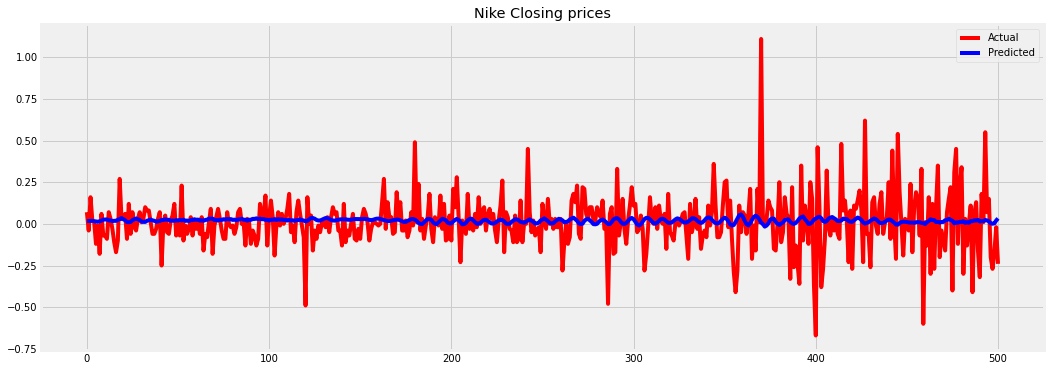

In [0]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Nike Closing prices')
plt.show()

In a classical time series forecasting task, the first standard decision when modeling involves the adoption of statistical methods or other pure machine learning models, including three based algorithms or deep learning techniques. The choice is strongly related to the problem we are carrying out but in general: statistical techniques are adequate when we face an autoregressive problem when the future is related only to the past; while machine learning models are suitable for more complex situations when it’s also possible to combine variegated data sources.

Now, we combine the ability of the statistical method to learn from experience with the generalization of deep learning techniques. Our task is a multivariate time series forecasting problem, so we use the multivariate extension of ARIMA, known as VAR, and a simple LSTM structure. We don’t produce an ensemble model; we use the ability of VAR to filter and study history and provide benefit to our neural network in predicting the future.

Our workflow can be summarized as follow:

* Estimate a VAR properly on our training data;


* Extract what VAR has learned and use it to improve the training process of an LSTM model performing a two-step training.

We’ll see that our results aren’t obvious because, following this procedure, we have to fight the problem of **Catastrophic Forgetting.**

In [0]:
df.dropna(axis=1, inplace=True, how='all')
df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df.index , format = '%d/%m/%Y')
date = df['Date'].values
df.set_index('Date', inplace=True)

df.columns = [col.split('(')[0] for col in df.columns]

print(df.shape)
df.head()

(3019, 6)


,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.85,10.92,10.67,10.74,18468800,NKE
2006-01-04,10.71,10.80,10.67,10.69,15832000,NKE
2006-01-05,10.69,10.83,10.69,10.76,9256000,NKE
2006-01-06,10.79,10.83,10.71,10.72,7573600,NKE
2006-01-09,10.72,10.98,10.72,10.88,10441600,NKE


In [0]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [0]:

df = df.drop(['Name'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,10.85,10.92,10.67,10.74,18468800
2006-01-04,10.71,10.80,10.67,10.69,15832000
2006-01-05,10.69,10.83,10.69,10.76,9256000
2006-01-06,10.79,10.83,10.71,10.72,7573600
2006-01-09,10.72,10.98,10.72,10.88,10441600


To correctly develop a VAR model, the same classical assumptions encountered when fitting an ARIMA, have to be satisfied. We need to grant stationarity and remove autocorrelation behavior. These prerequisites enable us to develop a stable model. Our time series are stationary in mean but locking at autocorrelation plots some interest patterns appear. A periodical weekly pattern is present in all series. To remove them a differentiation is needed (24x7 periods).


In [0]:
df_external = pd.DataFrame(df.index)

for col in df.columns:
    
    if df[col].dtype == object: # correct type
        df[col] = pd.to_numeric(df[col].str.replace(',', '.'))
    
    df[col] = df[col].replace(-200, np.nan) # check nans
    print(col, ':', df[col].isna().sum()/len(df))
    if df[col][:int(len(df)*0.8)].isna().sum()/int(len(df)*0.8) > 0.5: # at least 50% in train not nan
        df.drop(col, axis=1, inplace=True)
    else:
        df[col] = df[col].interpolate(method='linear', limit_direction='both') # fill nans

Open : 0.0
High : 0.0
Low : 0.0
Close : 0.0
Volume : 0.0


In [0]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [0]:
def cycle_encode(data, cols):
    
    for col in cols:
        
        data[col + '_sin'] = np.sin(2 * np.pi * data[col]/data[col].max())
        data[col + '_cos'] = np.cos(2 * np.pi * data[col]/data[col].max())
        
    return data

In [0]:
df_external['month'] = df_external.Date.dt.month
df_external['day'] = df_external.Date.dt.dayofweek

df_external = cycle_encode(df_external, ['month','day'])
df_external.drop(['month','day'], axis=1, inplace=True)
df_external.set_index('Date', inplace=True)

print(df_external.shape)
df_external.head()

(3019, 4)


,month_sin,month_cos,day_sin,day_cos
Date,,,,
2006-01-03,0.5,0.866025,1.000000e+00,6.123234e-17
2006-01-04,0.5,0.866025,1.224647e-16,-1.000000e+00
2006-01-05,0.5,0.866025,-1.000000e+00,-1.836970e-16
2006-01-06,0.5,0.866025,-2.449294e-16,1.000000e+00
2006-01-09,0.5,0.866025,0.000000e+00,1.000000e+00


In [0]:
train_date = date[:int(len(df)*0.8)]
train = df[:int(len(df)*0.8)].copy()

test_date = date[int(len(df)*0.8):]
test = df[int(len(df)*0.8):].copy()

print(train.shape, test.shape)

(2415, 5) (604, 5)


In [0]:
def plot_autocor(name, df):
    
    plt.figure(figsize=(16,4))
    
    # pd.plotting.autocorrelation_plot(df[name])
    # plt.title(name)
    # plt.show()
    
    timeLags = np.arange(1,100*24)
    plt.plot([df[name].autocorr(dt) for dt in timeLags])
    plt.title(name); plt.ylabel('autocorr'); plt.xlabel('time lags')
    plt.show()

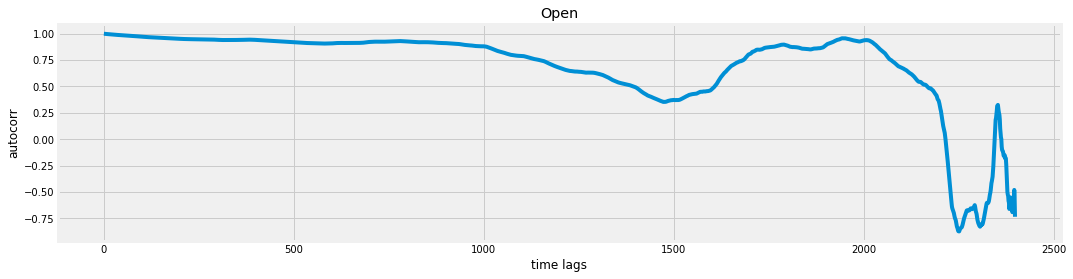

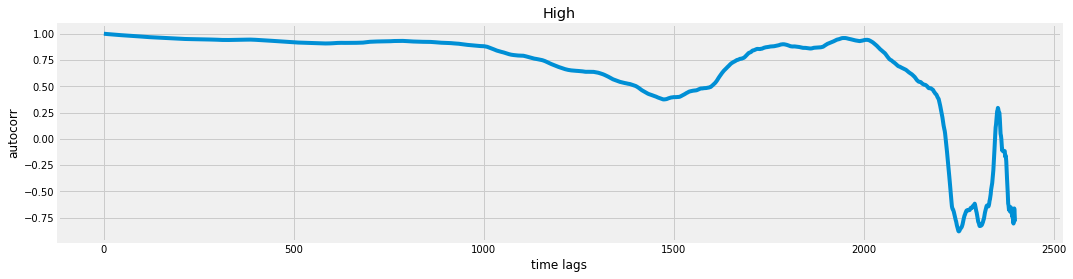

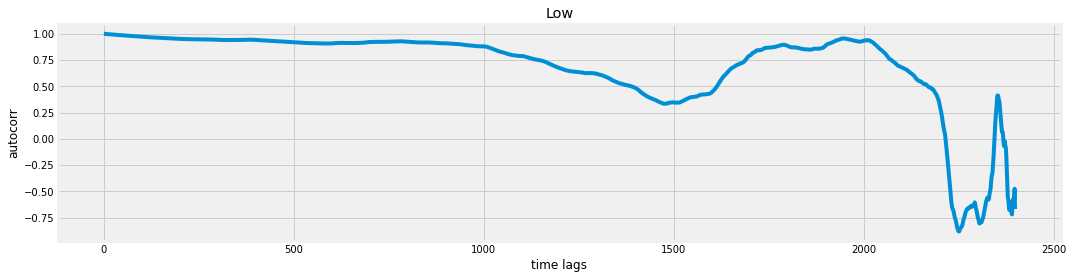

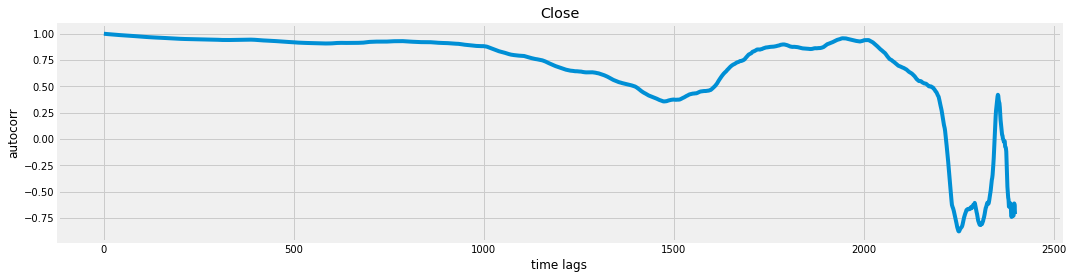

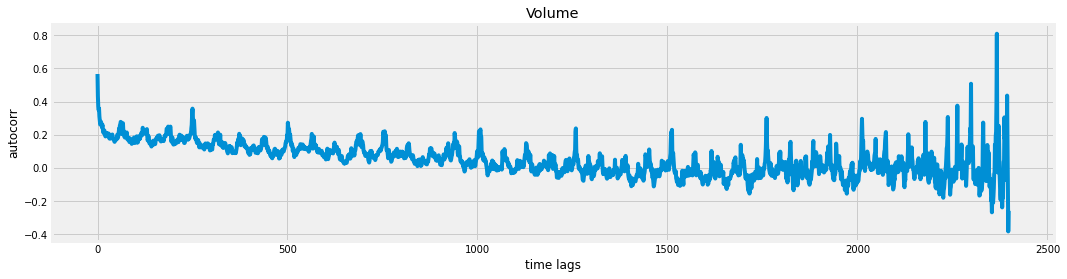

In [0]:
for col in df.columns:
    plot_autocor(col, train)

In [0]:
period = 24*7

df_diff = df.diff(period).dropna()
df_external = df_external.iloc[period:].copy()

In [0]:
train_diff = df_diff.iloc[:len(train),:].copy()
test_diff = df_diff.iloc[len(train)-period:,:].copy()

train_init = df.iloc[:len(train),:].copy()
test_init = df.iloc[len(train)-period: -period:,:].copy()

train_ext = df_external.iloc[:len(train),:].copy()
test_ext = df_external.iloc[len(train) - period:,:].copy()

print(train_diff.shape, train_init.shape, train_ext.shape)
print(test_diff.shape, test_init.shape, test_ext.shape)

(2415, 5) (2415, 5) (2415, 4)
(604, 5) (604, 5) (604, 4)


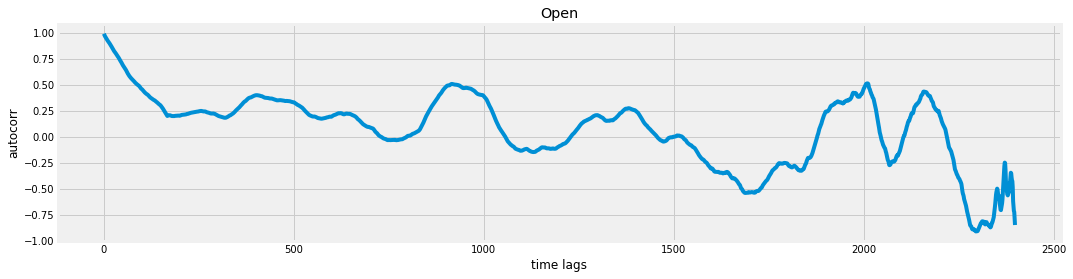

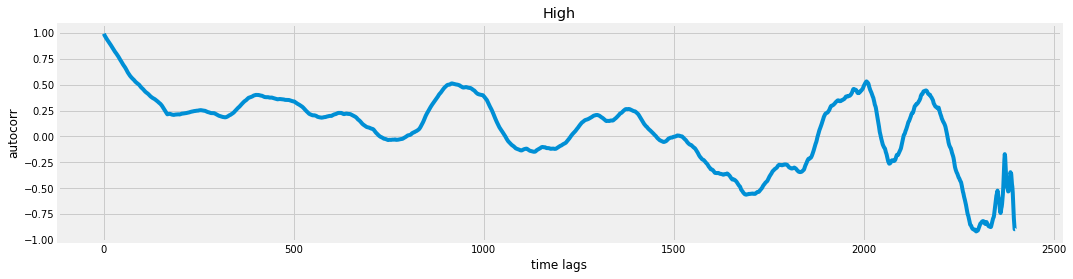

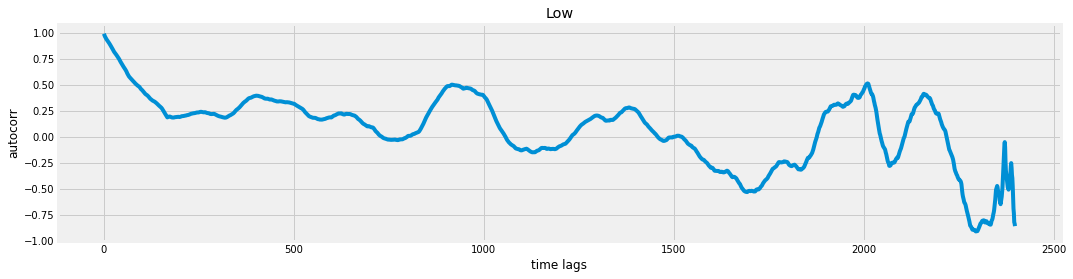

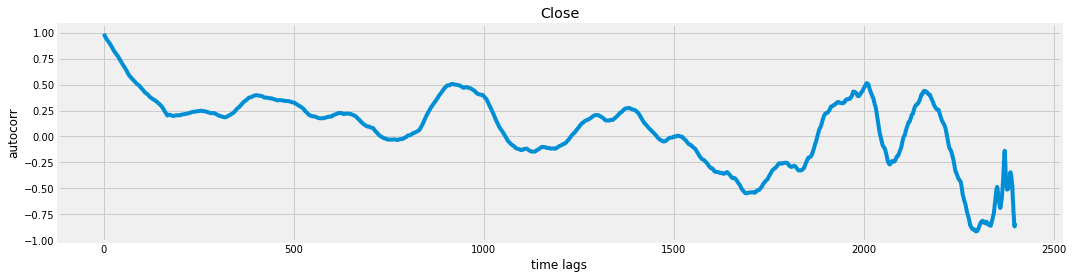

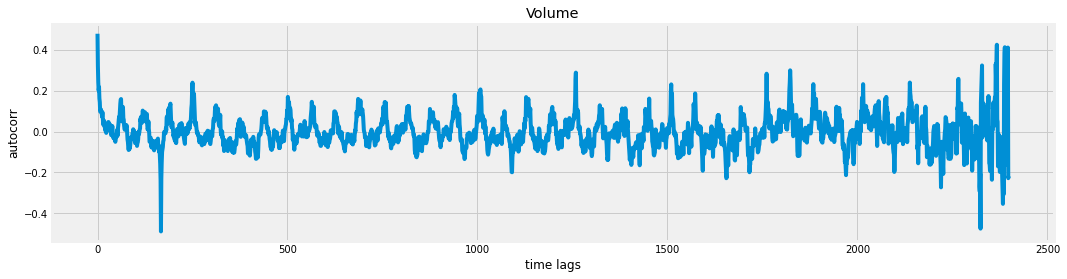

In [0]:
for col in df.columns:
    plot_autocor(col, train_diff)

In [0]:
AIC = {}
best_aic, best_order = np.inf, 0

for i in range(1,50):
    model = sm.tsa.VAR(endog=train_diff.values)
    model_result = model.fit(maxlags=i)
    AIC[i] = model_result.aic
    
    if AIC[i] < best_aic:
        best_aic = AIC[i]
        best_order = i
        
print('BEST ORDER', best_order, 'BEST AIC:', best_aic)

BEST ORDER 20 BEST AIC: 21.733878568514555


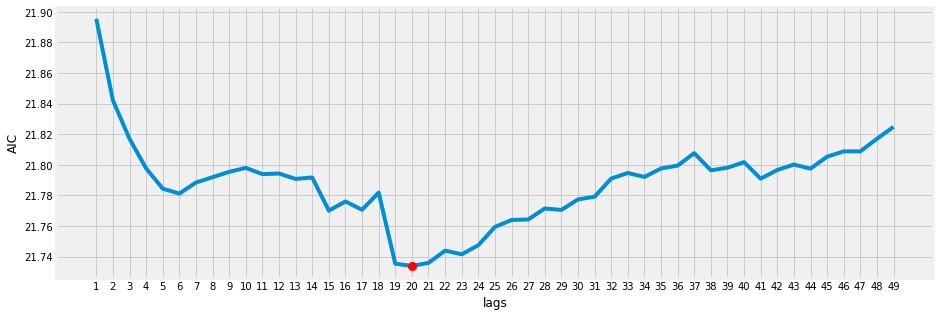

In [0]:
plt.figure(figsize=(14,5))
plt.plot(range(len(AIC)), list(AIC.values()))
plt.plot([best_order-1], [best_aic], marker='o', markersize=8, color="red")
plt.xticks(range(len(AIC)), range(1,50))
plt.xlabel('lags'); plt.ylabel('AIC')
np.set_printoptions(False)

In [0]:

var = sm.tsa.VAR(endog=train_diff.values)
var_result = var.fit(maxlags=best_order)
var_result.aic

21.733878568514555

In [0]:
def retrive_prediction(prior, prior_init, steps):
    
    pred = var_result.forecast(np.asarray(prior), steps=steps)
    init = prior_init.tail(period).values
    
    if steps > period:
        id_period = list(range(period))*(steps//period)
        id_period = id_period + list(range(steps-len(id_period)))
    else:
        id_period = list(range(steps))
    
    final_pred = np.zeros((steps, prior.shape[1]))
    for j, (i,p) in enumerate(zip(id_period, pred)):
        final_pred[j] = init[i]+p
        init[i] = init[i]+p    
        
    return final_pred

In [0]:
date = '2015-08-10'
forward = 604
date_range = test.index.tolist()

In [0]:
final_pred = retrive_prediction(df_diff.loc[:date], df.loc[:date], steps = forward)
final_true = df.loc[date_range]

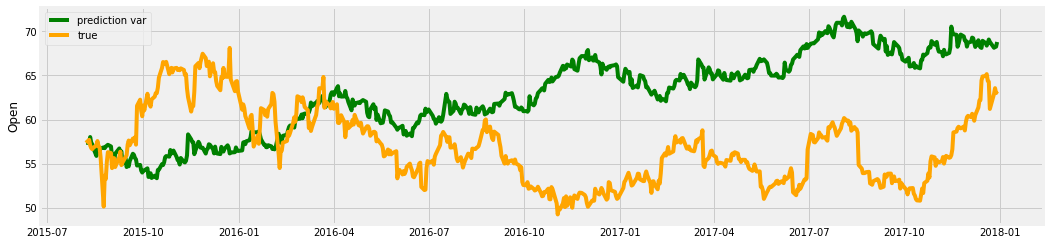

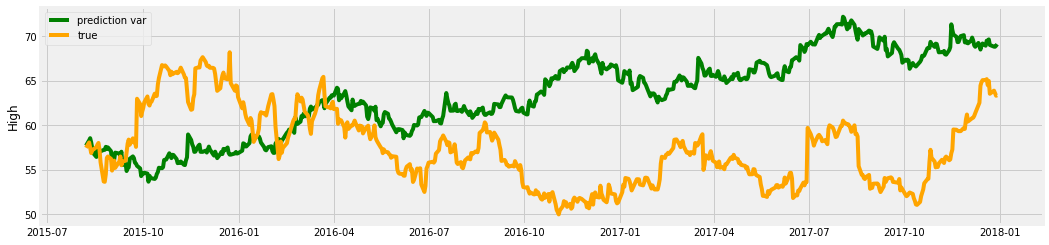

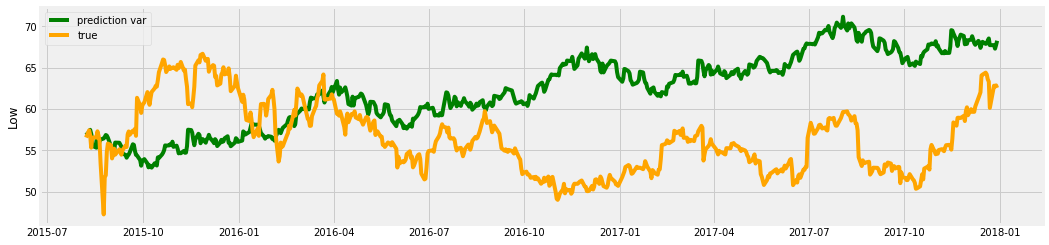

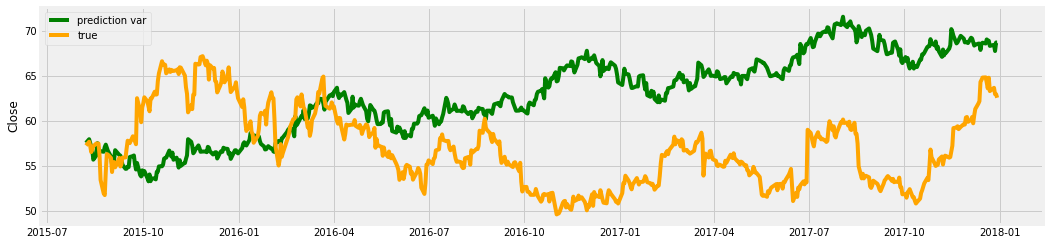

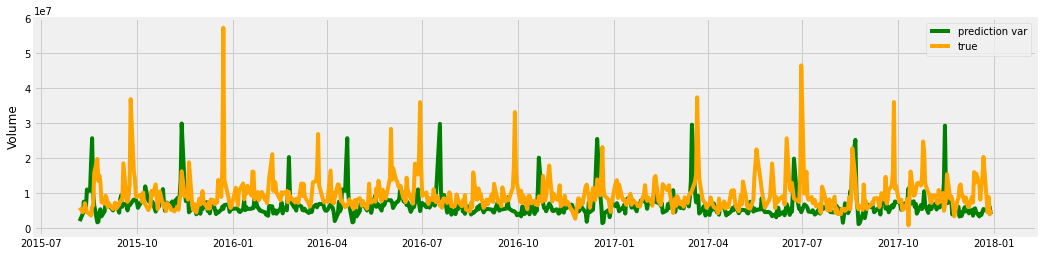

In [0]:
for i,col in enumerate(df.columns):

    plt.figure(figsize=(16,4))
    plt.plot(date_range, final_pred[:,i], c='green', label='prediction var')
    plt.plot(date_range, final_true[col].values, c='orange', label='true')
    plt.ylabel(col); plt.legend()
    plt.show()

Now our scope is to use our fitted VAR to improve the training of our neural network. The VAR has learned the internal behavior of our multivariate data source adjusting the insane values, correcting the anomalous trends and reconstructing properly the NaNs. All these pieces of information are stored in the fitted values, they are a modified version of the original data which have been manipulated by the model during the training procedure. In other words, we can see these values as a kind of augmented data source of the original train.
Our strategy involves applying a two-step training procedure. We start feeding our LSTM model, for one step ahead forecasting of all the series at our disposal (multivariate output), using the fitted values produced by VAR. Then we conclude the training with the raw data, in our case they are the same differential data we used before to fit the VAR. With LSTM we can also combine external data sources, for example, the weather conditions or some time attributes like weekdays, hours and months that we cyclically encode.

We hope that our neural network can learn from two different but similar data sources and perform better on our test data. Our approach sounds great but this is not a ‘free lunch’. When performing multiple-steps training we have to take care of the Catastrophic Forgetting problem. Catastrophic forgetting is a problem faced by many models and algorithms. When trained on one task, then trained on a second task, many machine learning models “forget” how to perform the first task. This is widely believed to be a serious problem for neural networks.

To avoid this tedious problem, the usage of dropout is suggested, moreover, the structure of the entire network has to be properly tuned to provide a benefit in performance terms. From these observations, we preserve a final part of our previous training as validation.

Technically speaking the network is very simple. We adopt the TimeseriesGenerator of Keras to fit our model.

In [0]:
training_set = nike[:'2015'].iloc[:,1:2].values
test_set = nike['2016':].iloc[:,1:2].values

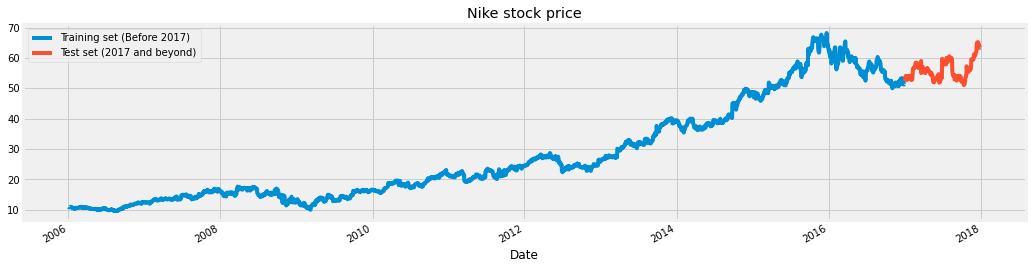

In [0]:
nike["High"][:'2016'].plot(figsize=(16,4),legend=True)
nike["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('Nike stock price')
plt.show()

In [0]:
X = var_result.fittedvalues

y_train = train.iloc[best_order:].values
y_train_var = X + train_init.iloc[best_order:].values
X_train = np.concatenate([train_diff.iloc[best_order:].values, train_ext.iloc[best_order:].values], axis=1)
X_train_var = np.concatenate([X, train_ext.iloc[best_order:].values], axis=1)

print(y_train.shape, X_train.shape)


y_val = y_train[int(len(X)*0.8):]
y_val_var = y_train_var[int(len(X)*0.8):]
X_val = X_train[int(len(X)*0.8):]
X_val_var = X_train_var[int(len(X)*0.8):]

print(y_val.shape, X_val.shape)

y_train = y_train[:int(len(X)*0.8)]
y_train_var = y_train_var[:int(len(X)*0.8)]
X_train = X_train[:int(len(X)*0.8)]
X_train_var = X_train_var[:int(len(X)*0.8)]

print(y_val_var.shape, X_val_var.shape)

y_test = test.values
X_test = np.concatenate([test_diff.values, test_ext.values], axis=1)

(2395, 5) (2395, 9)
(479, 5) (479, 9)
(479, 5) (479, 9)


In [0]:
from sklearn.preprocessing import StandardScaler

scaler_y = StandardScaler()
scaler = StandardScaler()

y_train = scaler_y.fit_transform(y_train)
y_train_var = scaler_y.transform(y_train_var)
y_val = scaler_y.transform(y_val)
y_val_var = scaler_y.transform(y_val_var)
y_test = scaler_y.transform(y_test)

X_train = scaler.fit_transform(X_train)
X_train_var = scaler.transform(X_train_var)
X_val = scaler.transform(X_val)
X_val_var = scaler.transform(X_val_var)
X_test = scaler.transform(X_test)

In [0]:

def autocor_pred(real, pred, lag=1):
    return pearsonr(real[:-lag], pred[lag:])[0]

In [0]:
import keras

seq_length = 30

def get_model():
  # regressor = Sequential()
  # # First LSTM layer with Dropout regularisation
  # regressor.add(LSTM(units=50, return_sequences=True))
  # regressor.add(Dropout(0.2))
  # # Second LSTM layer
  # regressor.add(LSTM(units=50, return_sequences=True))
  # regressor.add(Dropout(0.2))
  # # Third LSTM layer
  # regressor.add(LSTM(units=50, return_sequences=True))
  # regressor.add(Dropout(0.2))
  # # Fourth LSTM layer
  # regressor.add(LSTM(units=50))
  # regressor.add(Dropout(0.2))
  # # The output layer
  # regressor.add(Dense(units=1))
  # model = Model(regressor)
  # model.compile(optimizer='rmsprop',loss='mse')

  # return model

  opt = keras.optimizers.RMSprop(lr=0.002)
    
  inp = keras.layers.Input(shape=(seq_length, 9))
  #x = Dense(64)(inp)
  x = LSTM(64)(inp)
  x = Dense(64, activation='relu')(x)
  x = Dropout(0.2)(x)
  
  out = Dense(5)(x)
  
  model = Model(inp, out)
  model.compile(optimizer='rmsprop', loss='mse')
  print(model.summary())
  return model



In [0]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

generator_train = TimeseriesGenerator(X_train, y_train, length=seq_length, batch_size=32)
generator_train_var = TimeseriesGenerator(X_train_var, y_train_var, length=seq_length, batch_size=32)
generator_val = TimeseriesGenerator(X_val, y_val, length=seq_length, batch_size=32)
generator_val_var = TimeseriesGenerator(X_val_var, y_val_var, length=seq_length, batch_size=32)
generator_test = TimeseriesGenerator(X_test, y_test, length=seq_length, batch_size=32)

In [0]:
tf.random.set_seed(33)
os.environ['PYTHONHASHSEED'] = str(33)
np.random.seed(33)
random.seed(33)

session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1, 
    inter_op_parallelism_threads=1
)
sess = tf.compat.v1.Session(
    graph=tf.compat.v1.get_default_graph(), 
    config=session_conf
)
tf.compat.v1.keras.backend.set_session(sess)


es = EarlyStopping(patience=5, verbose=1, min_delta=0.001, monitor='val_loss', mode='auto', restore_best_weights=True)

print('--------', 'train model with VAR fitted values', '--------')
model_var = get_model()
model_var.fit_generator(generator_train_var, steps_per_epoch= len(generator_train_var),
                        epochs=100, validation_data=generator_val_var, validation_steps = len(generator_val_var), 
                        callbacks=[es], verbose = 1)


print('--------', 'train model with raw data', '--------')
model_var.fit_generator(generator_train, steps_per_epoch= len(generator_train),
                        epochs=100, validation_data=generator_val, validation_steps = len(generator_val), 
                        callbacks=[es], verbose = 1)

-------- train model with VAR fitted values --------
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 30, 9)             0         
_________________________________________________________________
lstm_43 (LSTM)               (None, 64)                18944     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 325       
Total params: 23,429
Trainable params: 23,429
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
59/59 [==============================] - 2s 28ms/st

In [0]:
true = scaler_y.inverse_transform(y_test[seq_length:])

pred = model_var.predict_generator(generator_test)
pred = scaler_y.inverse_transform(pred)

In [0]:
tf.random.set_seed(33)
os.environ['PYTHONHASHSEED'] = str(33)
np.random.seed(33)
random.seed(33)

session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1, 
    inter_op_parallelism_threads=1
)
sess = tf.compat.v1.Session(
    graph=tf.compat.v1.get_default_graph(), 
    config=session_conf
)
tf.compat.v1.keras.backend.set_session(sess)


es = EarlyStopping(patience=5, verbose=1, min_delta=0.001, monitor='val_loss', mode='auto', restore_best_weights=True)

simple_model = get_model()
simple_model.fit_generator(generator_train, steps_per_epoch= len(generator_train),
                            epochs=100, validation_data=generator_val, validation_steps = len(generator_val), 
                            callbacks=[es], verbose = 1)

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 30, 9)             0         
_________________________________________________________________
lstm_44 (LSTM)               (None, 64)                18944     
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_32 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 325       
Total params: 23,429
Trainable params: 23,429
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
59/59 [==============================] - 2s 26ms/step - loss: 0.9700 - val_loss: 33.3282
Epoch 2/100
59/

In [0]:
pred_simple = simple_model.predict_generator(generator_test)
pred_simple = scaler_y.inverse_transform(pred_simple)

In [0]:
from keras.losses import mean_absolute_error
from scipy.stats import pearsonr
### COMPUTE METRICS ON TEST DATA ###

diz_error_lstm, diz_ac_lstm = {}, {}
diz_error_var_lstm, diz_ac_var_lstm = {}, {}


for i,col in enumerate(df.columns):
    
    error = mean_absolute_error(true[:,i], pred_simple[:,i])
    diz_error_lstm[col] = error
    
    error = mean_absolute_error(true[:,i], pred[:,i])
    diz_error_var_lstm[col] = error
    
    ac = autocor_pred(true[:,i], pred_simple[:,i])
    diz_ac_lstm[col] = ac
    
    ac = autocor_pred(true[:,i], pred[:,i])
    diz_ac_var_lstm[col] = ac

In [0]:
for key, value in diz_error_lstm.items():
  if key == "Volume":
    pass
  else:
    diz_error_lstm[key] = value*100000

for key, value in diz_error_var_lstm.items():
  if key == "Volume":
    pass
  else:
    diz_error_var_lstm[key] = value*100000

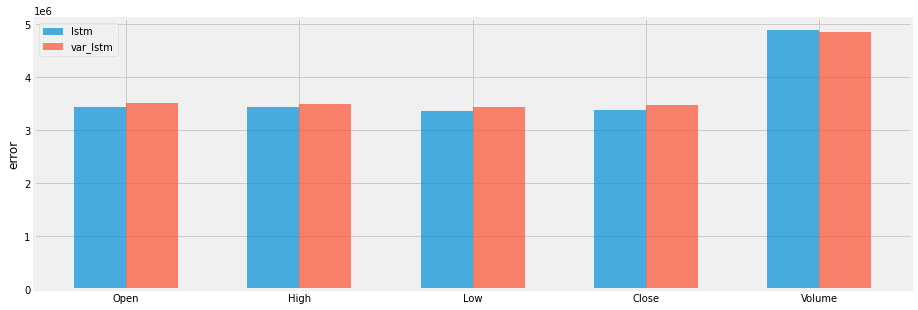

In [0]:
plt.figure(figsize=(14,5))
plt.bar(np.arange(len(diz_error_lstm))-0.15, diz_error_lstm.values(), alpha=0.7, width=0.3, label='lstm')
plt.bar(np.arange(len(diz_error_var_lstm))+0.15, diz_error_var_lstm.values(), alpha=0.7, width=0.3, label='var_lstm')
plt.xticks(range(len(diz_error_lstm)), diz_error_lstm.keys())
plt.ylabel('error'); plt.legend()
np.set_printoptions(False)

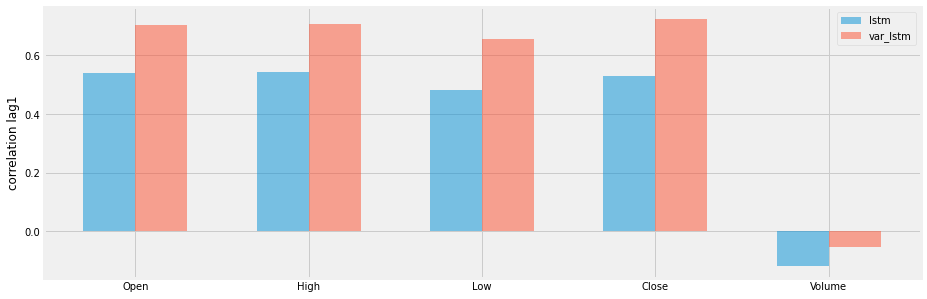

In [0]:
plt.figure(figsize=(14,5))
plt.bar(np.arange(len(diz_ac_lstm))-0.15, diz_ac_lstm.values(), alpha=0.5, width=0.3, label='lstm')
plt.bar(np.arange(len(diz_ac_var_lstm))+0.15, diz_ac_var_lstm.values(), alpha=0.5, width=0.3, label='var_lstm')
plt.xticks(range(len(diz_ac_lstm)), diz_ac_lstm.keys())
plt.ylabel('correlation lag1'); plt.legend()
np.set_printoptions(False)

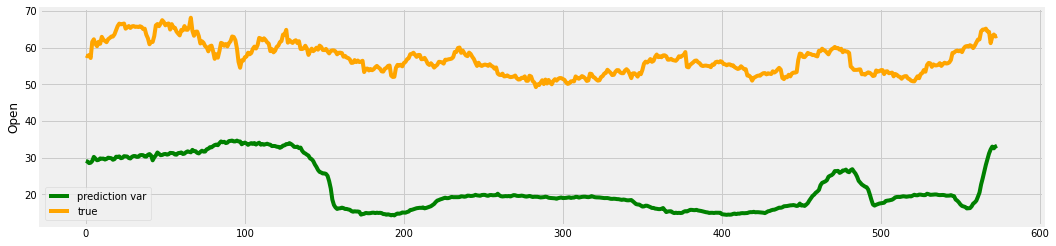

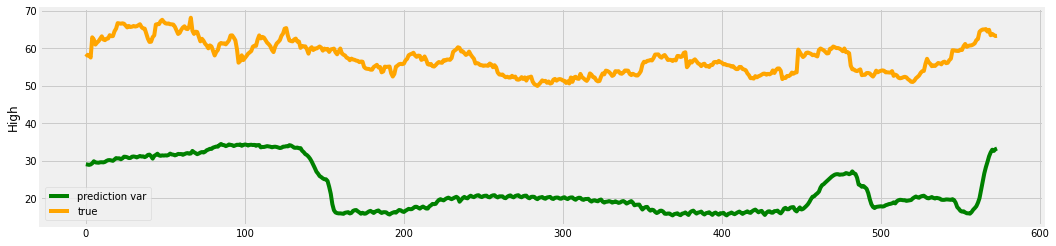

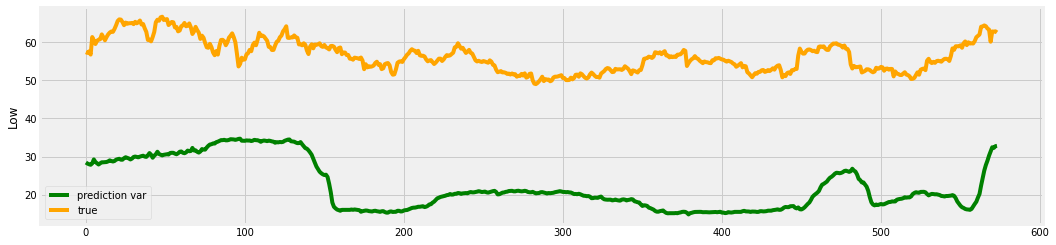

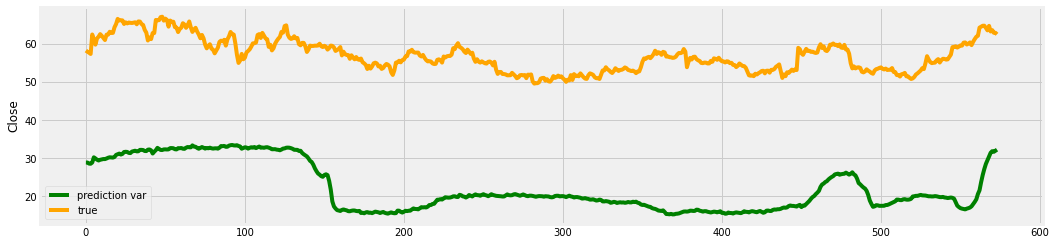

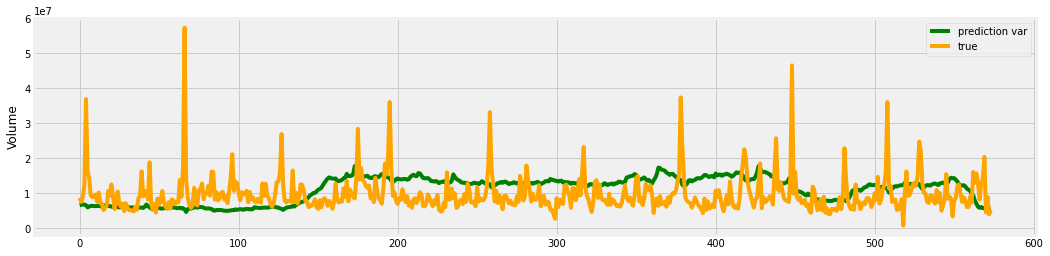

In [0]:
for i,col in enumerate(df.columns):
  plt.figure(figsize=(16,4))
  plt.plot(pred[:,i], c='green', label='prediction var')
  plt.plot(true[:,i], c='orange', label='true')
  plt.ylabel(col); plt.legend()
  plt.show()

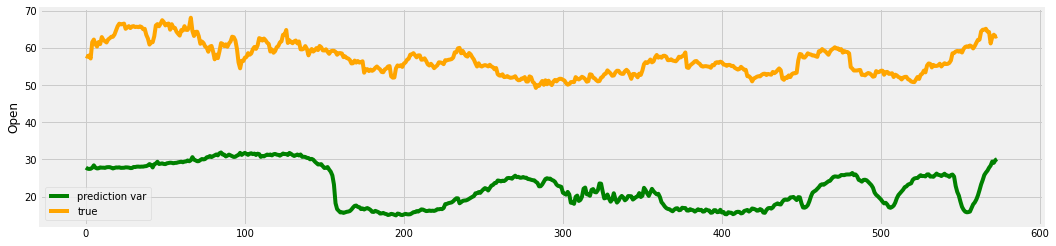

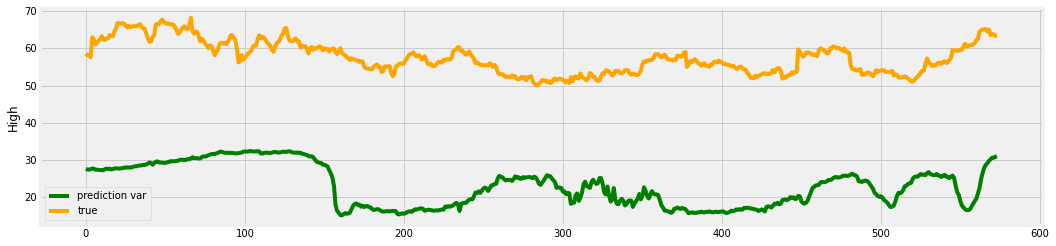

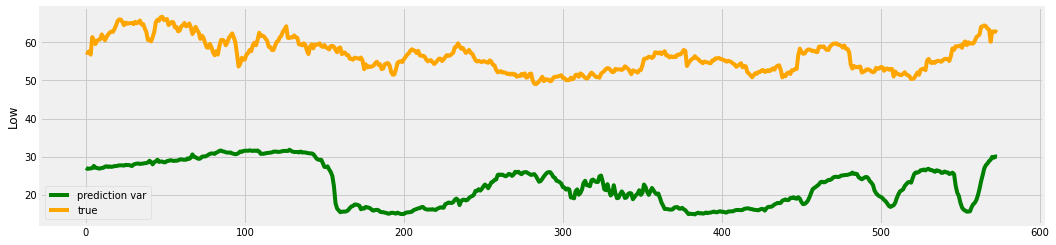

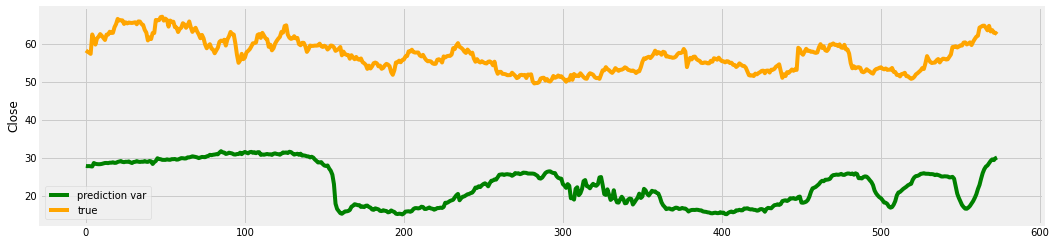

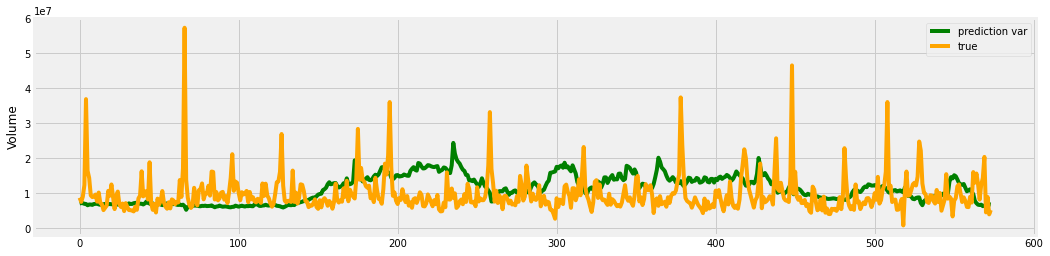

In [0]:
for i,col in enumerate(df.columns):
  plt.figure(figsize=(16,4))
  plt.plot(pred_simple[:,i], c='green', label='prediction var')
  plt.plot(true[:,i], c='orange', label='true')
  plt.ylabel(col); plt.legend()
  plt.show()

We see now that even though VAR fit LSTMs do symbolize trends appropriately, they still suffer from Catastrophic Forgetting. 

Catastrophic forgetting — whereby a model trained on one task is fine-tuned on a second, and in doing so, suffers a “catastrophic” drop in performance over the first task — is a hurdle in the development of better transfer learning techniques. Despite impressive progress in reducing catastrophic forgetting, we have limited understanding of how different architectures and hyper-parameters affect forgetting in a network. Primary findings suggest that CNNs forget less than LSTMs because of the reason that max-pooling is the underlying operation which helps CNNs alleviate forgetting compared to LSTMs. Also, curriculum learning, placing a hard task towards the end of task sequence, reduces forgetting. On further analysis, the effect of fine-tuning contextual embeddings on catastrophic forgetting found that using embeddings as feature extractor is preferable to fine-tuning in continual learning setup.

However, our two step process here does improve the performance slightly across larger volume content.




In [0]:
# import time
# start = time.time()

# test_dataa=test_set

# A=[[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
# const=0
# P_init=[[10**-7,0,0,0],[0,10**-7,0,0],[0,0,10**-7,0],[0,0,0,10**-7]]
# R=[[10**-7,0,0,0],[0,10**-7,0,0],[0,0,10**-7,0],[0,0,0,10**-7]]
# Q=[[10**-7,0,0,0],[0,10**-7,0,0],[0,0,10**-7,0],[0,0,0,10**-7]]
# KF=[]
# update=[]
# KF.append(test_dataa[0])
# KF.append(test_dataa[1])
# KF.append(test_dataa[2])
# KF.append(test_dataa[4])
# for i in range(4,len(test_dataa)-4):
#     x_init=[[test_dataa[i-4]],[test_dataa[i-3]],[test_dataa[i-2]],[test_dataa[i-1]]]
#     #prediction
#     print(A)
#     break
#     #prediction=np.dot(A,x_init)+const
#     #print(x_min[1])
#     P_min=np.dot(np.dot(A,P_init),A)+Q
#     KF.append(prediction[3].tolist()[0])
#     #measurement update
#     y_min=prediction[3]
#     #print(y_min)
#     P_y_min=P_min+R
#     K_gain=np.dot(P_min,np.linalg.inv(P_y_min))[3][3]
#     #print(K_gain)
#     x_init=prediction-K_gain*(y_min-test_dataa[i])
#     update.append(x_init)
#     #x_init=np.array([])
#     #print(x_init)
#     P_init=P_min-K_gain*P_min
# #print(KF[0:10])   
# #print(test_dataa[0:10])
# #df['KF']=KF

# # mse = mean_squared_error(KF, test_dataa[0:len(test_dataa)-4])
# # print('MSE: '+str(mse))
# # mae = mean_absolute_error(KF, test_dataa[0:len(test_dataa)-4])
# # print('MAE: '+str(mae))
# # rmse = math.sqrt(mean_squared_error(KF, test_dataa[0:len(test_dataa)-4]))
# # print('RMSE: '+str(rmse))

# end = time.time()

# elapsed = end - start
# print("Time elapsed:" +str(elapsed)+" s")

# plt.plot(test_dataa,label='test data')
# plt.plot(KF,'green',label='Kalman filter prediction')
# plt.title('Kalman filter')
# plt.legend()
# plt.show()


[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]


**FUTURE WORK**



1.   Further improve LSTM performance by changing the dimensions to better fit the var predicted results across more dense layers. Also, try and check if Gated Recurrent Units make a difference.
2.   **BERT** : I have been trying to use Bert to analyze financial news dataset about the Dow Jones averages as well as sentiments about companies to predict seasonal trends across sentiments about companies. This mixed setup will truly let the financial system flourish.
3. Incorporate Fast Moving Kalman Filters to serve the statistical time series process for forecasting trade pairs.
4. Try and improve the forgetfulness of the networks further by incorporating Curriculum learning

**Main Objective** 

All of these will lead to a space where I can build an algorithm to better evaluate pair options and risk merger arbitrage over short time periods, leading to risk based fast trading. Fingers Crossed.



**References**



1.   [Time Series Forecasting with Arima, LSTM and Prophet](https://medium.com/@cdabakoglu/time-series-forecasting-arima-lstm-prophet-with-python-e73a750a9887)
2.   [Stock Price Correlation Coefficient Prediction using ARIMA + LSTM Hybrid](https://arxiv.org/pdf/1808.01560.pdf)
3. [Using Keras LSTM for stock market prediction](https://www.kdnuggets.com/2018/11/keras-long-short-term-memory-lstm-model-predict-stock-prices.html)
4. [Machine Learning techniques for stock price prediction](https://towardsdatascience.com/machine-learning-techniques-applied-to-stock-price-prediction-6c1994da8001)
5. [High Frequency Statistical Arbitrage
with Kalman Filter and Markov
Chain Monte Carlo](https://pdfs.semanticscholar.org/f99b/9152ba53cdd85a6114ddeb7b2bd745f9db76.pdf)



